<a href="https://colab.research.google.com/github/SnayderZ/Red_Neuronal_mnist/blob/main/Red_Neuronal_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Red Neuronal con MNIST
Autor: Snayder Zuñiga  
Fecha: 24/09/2025  

Este proyecto entrena una red neuronal para reconocer dígitos escritos a mano (dataset MNIST).


# 1. Importar librerías

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

# 2. Cargar dataset MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Definir el modelo

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 4. Compilar y entrenar

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8747 - loss: 0.4315 - val_accuracy: 0.9717 - val_loss: 0.0992
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9660 - loss: 0.1081 - val_accuracy: 0.9693 - val_loss: 0.1055
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9773 - loss: 0.0726 - val_accuracy: 0.9787 - val_loss: 0.0711
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9833 - loss: 0.0535 - val_accuracy: 0.9777 - val_loss: 0.0778
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9862 - loss: 0.0417 - val_accuracy: 0.9740 - val_loss: 0.0905


# 5. Evaluación

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión en test: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9749 - loss: 0.0836

Precisión en test: 0.9749


# 6. Graficar precisión

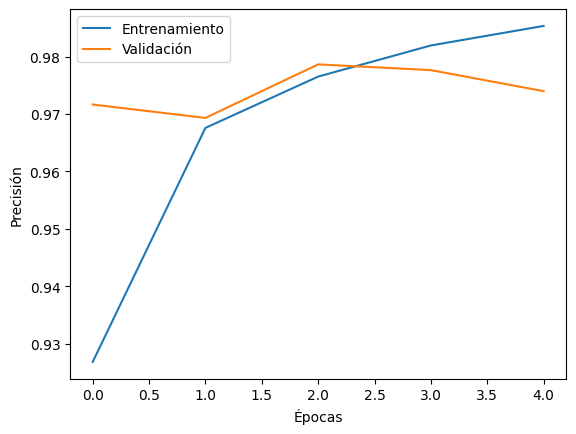

In [ ]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# 7. Probar con un ejemplo aleatorio

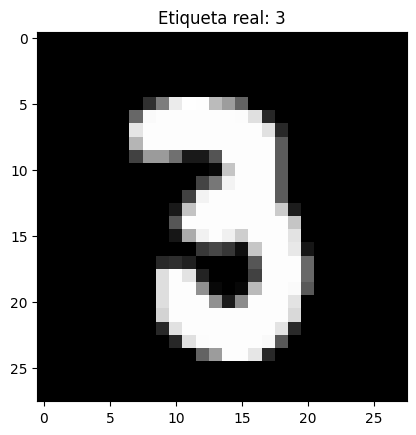

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicción de la red: 3


In [ ]:
i = random.randint(0, len(x_test)-1)
plt.imshow(x_test[i], cmap="gray")
plt.title(f"Etiqueta real: {y_test[i]}")
plt.show()

img = np.expand_dims(x_test[i], axis=0)
prediccion = model.predict(img)
print("Predicción de la red:", np.argmax(prediccion))